In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import make_classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from targen.data import target
import seaborn as sns

# Generate some data

Generate 1000 rows and 5 features

In [2]:
X, dummy = make_classification(
    n_samples=1000,
    n_features=5
)

data = pd.DataFrame(X, columns = [f'col_{ix}' for ix in range(X.shape[1])])

In [3]:
data.head()

,col_0,col_1,col_2,col_3,col_4
0,-1.316552,-0.507394,-0.323585,0.073442,0.823657
1,0.344911,1.009425,0.336174,0.102778,-1.166966
2,0.501864,-0.089878,-0.807211,0.619811,1.295799
3,0.894425,0.768150,-0.810028,0.940682,0.746358
4,-0.096518,1.834909,-1.469969,1.870790,1.069851


#### Define the target based on different expressions

In [4]:
expressions = {}

# linear component
expressions['linear'] = {
    'weight':0.9,
    'expr':'-0.5*col_0 + 2.*col_1 + 0.7*col_4 -0.4*col_3'
}

# non linear component
expressions['non_linear'] = {
    'weight':0.1,
    'expr':'-0.7*col_1**1.5 + 0.2*sin(col_2)+ 0.9*log(col_4+0.5) -0.1*col_3**2'
}

# interaction component
expressions['interaction'] = {
    'weight':0.9,
    'expr':'0.7*col_3*col_4 -0.5*(col_2/(col_1+col_2))'
}

# conditional component
expressions['conditional']= {
    'weight':0.4,
    'expr':{
        'col_0>0':(
            '-0.5*col_0 + 2.*col_1 + 0.7*col_4 -0.4*col_3', #True
            0 #False
        ),
        'col_2>0.15':(
            '-0.5*col_0 + 2.*col_2 + 0.2*col_1 -0.7*col_4',#True
            '-0.5*col_1' #False
        )
    }
}

expressions['uniform_noise'] = {'weight':1.3}
expressions['gaussian_noise'] = {
    'weight':0.8,
    'mu_gaus': 2.22
}

In [5]:
expressions

{'linear': {'weight': 0.9,
  'expr': '-0.5*col_0 + 2.*col_1 + 0.7*col_4 -0.4*col_3'},
 'non_linear': {'weight': 0.1,
  'expr': '-0.7*col_1**1.5 + 0.2*sin(col_2)+ 0.9*log(col_4+0.5) -0.1*col_3**2'},
 'interaction': {'weight': 0.9,
  'expr': '0.7*col_3*col_4 -0.5*(col_2/(col_1+col_2))'},
 'conditional': {'weight': 0.4,
  'expr': {'col_0>0': ('-0.5*col_0 + 2.*col_1 + 0.7*col_4 -0.4*col_3', 0),
   'col_2>0.15': ('-0.5*col_0 + 2.*col_2 + 0.2*col_1 -0.7*col_4',
    '-0.5*col_1')}},
 'uniform_noise': {'weight': 1.3},
 'gaussian_noise': {'weight': 0.8, 'mu_gaus': 2.22}}

In [6]:
df_score = target.get_target_and_contributions(data, 
                                               expressions= expressions, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True
                                              )


In [7]:
df_score.head()

,score_linear,score_non_linear,score_interaction,score_conditional,score_uniform_noise,score_gaussian_noise,score_pred,score_total,y
0,0.545242,0.751244,0.522327,0.082052,0.355975,0.064849,1.900865,4.222554,0
1,0.620797,0.252748,0.405337,0.916400,0.218636,0.704799,2.195282,5.313999,0
2,0.543320,0.729625,0.654199,0.499198,0.026969,0.599527,2.426340,5.479177,0
3,0.640099,0.528081,0.663856,0.538671,0.710701,0.243078,2.370707,5.695193,0
4,0.881358,0.353051,0.840576,0.003019,0.043366,0.604163,2.078004,4.803536,0


# Predictive power (ROC AUC)

In [8]:
from sklearn.metrics import roc_auc_score

print(f"Maximum predictive AUC {round(roc_auc_score(df_score['y'],df_score['score_pred']),3)}")


Maximum predictive AUC 0.976


### For every component 

In [9]:

print(f"Maximum predictive AUC {round(roc_auc_score(df_score['y'],df_score['score_pred']),3)}")
print(f"Linear componend AUC {round(roc_auc_score(df_score['y'],df_score['score_linear']),3)}")
print(f"Non linear AUC {round(roc_auc_score(df_score['y'],df_score['score_non_linear']),3)}")
print(f"Interaction AUC {round(roc_auc_score(df_score['y'],df_score['score_interaction']),3)}")
print(f"Conditional AUC {round(roc_auc_score(df_score['y'],df_score['score_conditional']),3)}")

Maximum predictive AUC 0.976
Linear componend AUC 0.82
Non linear AUC 0.434
Interaction AUC 0.936
Conditional AUC 0.642


In [10]:
df_score

,score_linear,score_non_linear,score_interaction,score_conditional,score_uniform_noise,score_gaussian_noise,score_pred,score_total,y
0,0.545242,0.751244,0.522327,0.082052,3.559748e-01,0.064849,1.900865,4.222554,0
1,0.620797,0.252748,0.405337,0.916400,2.186363e-01,0.704799,2.195282,5.313999,0
2,0.543320,0.729625,0.654199,0.499198,2.696882e-02,0.599527,2.426340,5.479177,0
3,0.640099,0.528081,0.663856,0.538671,7.107011e-01,0.243078,2.370707,5.695193,0
4,0.881358,0.353051,0.840576,0.003019,4.336554e-02,0.604163,2.078004,4.803536,0
...,...,...,...,...,...,...,...,...,...
995,0.671411,0.536687,0.609214,0.044696,8.067734e-01,0.329051,1.862008,4.859840,0
996,0.520047,0.878713,0.870853,0.491598,1.000000e-08,0.463017,2.761211,5.985439,0
997,0.323623,0.766291,0.342703,0.630940,2.266081e-01,0.352181,2.063557,4.705902,0
998,0.545203,0.587966,0.400834,0.427283,3.923350e-01,0.279328,1.961286,4.594235,0


### Plot all contributions

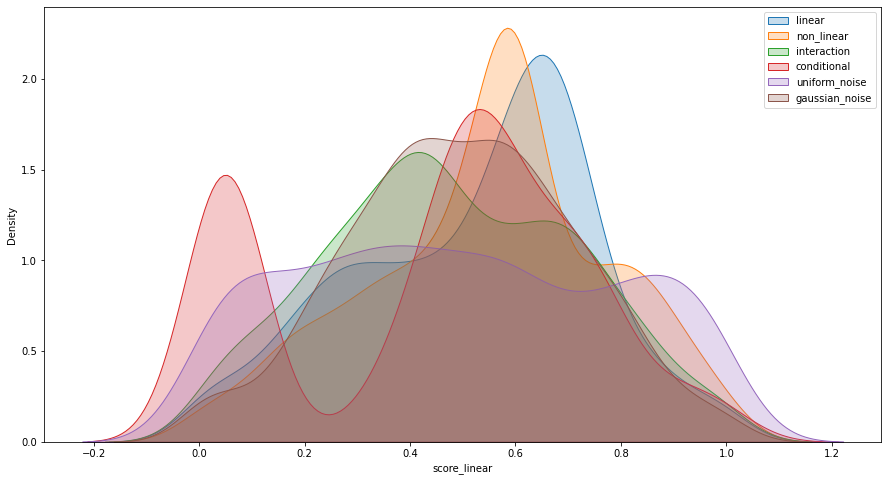

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
sns.kdeplot(df_score['score_linear'], fill=True, label='linear')
sns.kdeplot(df_score['score_non_linear'], fill=True, label='non_linear')
sns.kdeplot(df_score['score_interaction'], fill=True, label='interaction')
sns.kdeplot(df_score['score_conditional'], fill=True, label='conditional')
sns.kdeplot(df_score['score_uniform_noise'], fill=True, label='uniform_noise')
sns.kdeplot(df_score['score_gaussian_noise'], fill=True, label='gaussian_noise')
# sns.kdeplot(df_score['score_pred'], fill=False, label='predictive')
# sns.kdeplot(df_score['score_total'], fill=False, label='total')
ax.legend()